# Employment data: NFP

We examine U.S. employment data, in particular, 
**Nonfarm Payroll**, which has considerable influence 
on the financial markets. 

We focus on forecasting the monthly change in NFP
using a variety of optics:

- Baseline expectation since 1939
- Holt-Winters method
- Visual selection of local range
- Regression against S&P 500

The ideal point forecast would a weighted combination of
different techniques, but the standard errors
are inherently very large due to survey measurement error.

Examining the NFP data, much more volatility is involved than
what is commonly understood in the financial news.
Secondarily, we are left to also consider the
difference from "street" expectations
to assess possible impact on the markets
and the Fed's monetary policy.

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas
     
*CHANGE LOG*

    2016-05-24  Consider SPX and lagged corporate earnings.
    2015-11-12  Preliminary draft.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.16.0428 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.11
 ::  IPython 4.2.0
 ::  jupyter_core 4.1.0
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.10.4
 ::  pandas 0.18.0
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v4.16.0329 devNFP
 ::  Timestamp: 2016-05-25, 23:03:04 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


## NFP data

Federal Reserve FRED states: "Total **Nonfarm Payroll** is a measure of the number of 
U.S. workers in the economy that *excludes proprietors, private household 
employees, unpaid volunteers, farm employees, and the unincorporated self-employed*. 
This measure accounts for approximately 80 percent of the workers who 
contribute to Gross Domestic Product (GDP)."

It provides useful insights into the current economic situation 
because it is a good proxy for the number of jobs added or lost in an economy. 
Increases in employment might indicate that businesses are hiring which 
might also suggest that businesses are growing. Additionally, those who 
are newly employed have increased their personal incomes, which 
means (all else constant) their disposable incomes have also increased, 
thus fostering further economic expansion.

Generally, the U.S. labor force and levels of unemployment 
are subject to fluctuations due to seasonal changes in weather, major holidays, 
and the opening and closing of schools. The Bureau of Labor Statistics (BLS) 
adjusts the data to offset the seasonal effects to show non-seasonal changes: 
for example, women's participation in the labor force; or a general decline 
in the number of employees, a possible indication of a downturn in the economy. 

To closely examine seasonal and non-seasonal changes, the BLS releases 
two **monthly** statistical measures: the seasonally adjusted All Employees: 
Total Nonfarm (PAYEMS) and All Employees: Total Nonfarm (PAYNSA), 
which is not seasonally adjusted."

**The financial market keenly watches PAYEMS, thus we set *m4nfp* to that measure.**

In [3]:
#  Nonfarm Payroll workers in thousands, seasonally adjusted:
nfp = get( m4nfp )

In [4]:
#  We know the number of total workers, 
#  so test the assertion that NFP
#  "accounts for approximately 80 percent of the workers."
workers = get( m4workers )
nfp_ratio = todf( nfp / workers )

In [5]:
# # Uncomment to see plot:
# plot( nfp_ratio )

#  nfp_ratio gradually rose from 55% in 1950's
#            to about 75% currently.

So NFP currently accounts for **approximately 75% 
of all workers** *currently*. The nfp_ratio plot 
clearly shows the shift away from farms and into 
corporations since WWII.

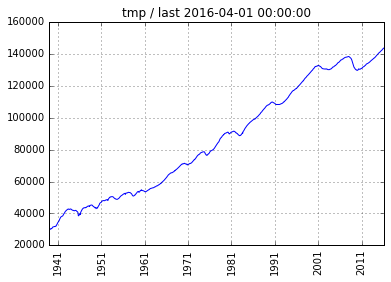

In [6]:
#  MAIN PLOT of plain NFP, in thousands of workers,
#            seasonally adjusted monthly.
plot( nfp )

In [7]:
#  NFP has a linear trend over the long-term...
nfp_trend = trend( nfp )

#  ... dataframe contains points of the computed uptrend.

 ::  regresstime slope = 128.909629362


In [8]:
#  Set slope for later calculation:
nfp_slope = 128.91
#  as of 2016-05-20: 128.91
#  as of 2016-04-19: 128.92
#  as of 2015-11-12: 128.98

The slope of the trend gives us a **baseline expectation: 
on average, 129,000 nonfarm workers can be expected to be added monthly** 
(given data from 1939 to 2016). We suspect that at the core, 
this trend could be modeled mainly by population dynamics,
but it is also related to the birth and death rate of business firms.

In [9]:
#  Take the first difference, i.e. Month over Month:
nfp_dif = dif( nfp, 1 )

In [10]:
#  Subtract the long-term base expected change:
nfp_dif_base = todf( nfp_dif - nfp_slope )

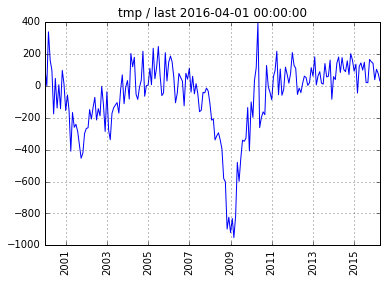

In [11]:
#  Our data goes back to 1939, 
#  so let's plot a recent subsegment:
plot( nfp_dif_base['2000':] )

The last plot depicts deviations from nfp_slope,
that is, deviations from our baseline expectation.

During the Great Recession, there were several months where about 
one million jobs were lost each month.
Consistent above average job additions started after 2011. 

The cumulative effect can be seen by looking at the deviations from trend.

In [12]:
nfp_dev = nfp - nfp_trend

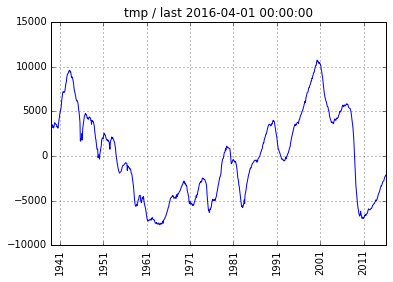

In [13]:
plot( nfp_dev )

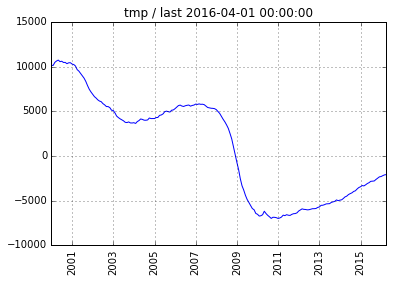

In [14]:
#  Zoom in on deviations post-2000:
plot( nfp_dev['2000':])

From 2008 through 2011, over 11 million workers were removed from NFP. 
As of April 2016 the recovery has been gradual, but still sub-trend. 

## Forecasting NFP as univariate time-series

*Presumably* examining the first difference series gives insight into 
how the economy is developing over the short-term. To forecast NFP, 
it is instructive to go back to the original series and use 
the Holt-Winters method.

In [15]:
#  Forecast 12 months into the future:
nfp_fc_holt = forecast( nfp, 12 )
nfp_fc_holt

         Forecast
0   143915.000000
1   144205.863284
2   144428.671615
3   144651.479947
4   144874.288279
5   145097.096610
6   145319.904942
7   145542.713274
8   145765.521605
9   145988.329937
10  146211.138268
11  146433.946600
12  146656.754932

In [16]:
#  Forecast NFP change for next month's release:
nfp_fc_holt.iloc[1] - nfp_fc_holt.iloc[0]

Forecast    290.863284
dtype: float64

A large difference between such forecasts
and the "street" expectations can cause
major shifts in the financial markets
on release day, especially the bond market.

This is especially true when the Federal Reserve
places more emphasis on labor market conditions
than economic activity in making their policy decision.
Note that employment is one of two mandates
which drives monetary policy.

In [17]:
#  Show recent dispersion around baseline expection of 129:
stat( nfp_dif_base['2000':] )

                Y
count  196.000000
mean   -61.894694
std    229.548441
min   -951.910000
25%   -154.160000
50%     -0.910000
75%     89.840000
max    393.090000


Our point forecast is unfortunately clouded by a rather
large standard deviation of approximately 230.


### Forecast NFP dif by local range

An *alternative* is to notice how nfp_dif has been range bound since 2011. 
The mean can serve as a point forecast for the change in NFP, 
and the standard deviation can estimate the standard error.

In [18]:
stat( nfp_dif['2011':] )

                Y
count   64.000000
mean   204.296875
std     74.896263
min     42.000000
25%    149.000000
50%    207.500000
75%    266.000000
max    346.000000


2015-11-12:  Our forecasted NFP change for Nov 2015 = **+205,000** +/- 77,000 at 1 std.
(So Fed would be discouraged by a change < +128,000 which happens to be 
our computed baseline trend.) 
The street mean prediction for Oct 2015 
was +185,000, but the actual turned out to be +271,000 -- whereupon 
Bill Gross declared 100% chance of December rate hike,
which in fact did transpire: indicating the divergence
of Fed policy from both the ECB and BOJ.

2016-04-27:  Our forecasted NFP change for April 2016 = **+205,000** +/- 75,000 at 1 std.
There is street chatter of a recession,
so perhaps a negative 2 std change would be convincing,
that is to say, less than +55,000 NFP announcement.

Interestingly the street expectation for April 2016 was also +205,000,
and the actual released figure was +160,000 (thus -0.60 std from street expectation).

2016-05-20: Our forecasted NFP change for May 2016 = **+204,000** +/- 75,000 at 1 std.

### Measurement sampling error

So far we have looked at the raw data, but let us briefly look at
the methodology which produces the NFP numbers by the
Bureau of Labor Statistics (BLS).

BLS uses the Current Employment Statistics (CES) program,
also known as the payroll survey or the establishment survey,
which is a monthly survey of approximately 146,000 businesses
and government agencies representing approximately
623,000 worksites throughout the United States.
See http://www.bls.gov/bls/empsitquickguide.htm

The survey is merely a statistical sampling of the entire working population
and therefore subject to measurement error.
Currently for NFP, the Bureau estimates the root mean squared error
to be approximately 62,800 with respect to the monthly level.
See http://www.bls.gov/web/empsit/cestn.htm#section1c

Thus measurement sampling error at the source 
is consistent with our estimated forecasting errors,
and should be regarded as the practical minimum error.

### Interim remarks on signal and noise

Examination of the raw data and the sampling techniques
reveal that much of what moves the market upon
the release of monthly NFP is largely based on
noise. That is to say, reading into any noisy changes
within the error bounds of a single monthly release
is statistically unsound.

NFP as an indicator of economic activity obviously involves *lag*.
A rear view mirror is only somewhat useful
in going forward fast on the freeway.

A *leading* indicator which correlates with NFP is
the stock market, as demonstrated in the next section.
(We tried corporate earnings as a proxy of economic activity,
but the fit with SPX is comparable, moreover,
SPX can be readily accessed in real-time.)

## NFP relationship to economic activity

Here we explore the relationship between a labor market statistic NFP and 
US economic activity using the SPX (S&P 500 index) as proxy.

When the stock market is booming, it is reasonable to expect more corporate workers 
on the payroll. There is high correlation, but the data shows that 
something more than a linear regression model is needed
to capture the volatile dynamics for short-term forecasting.

In [27]:
#  Resampled to monthly, the NFP frequency:
spx = get( m4spx )

 ::  S&P 500 prepend successfully goes back to 1957.


In [28]:
#  Data transformed logarithmically:
lnfp = np.log( nfp )
lspx = np.log( spx )

In [29]:
#  Define start and end:
start = '1980'
end   = '2020'

In [30]:
stat2(lnfp[start:end].Y, lspx[start:end].Y, intercept=True)

 ::  FIRST variable:
count    436.000000
mean      11.678566
std        0.145405
min       11.393793
25%       11.583956
50%       11.736881
75%       11.795143
max       11.876978
Name: Y, dtype: float64

 ::  SECOND variable:
count    437.000000
mean       6.422434
std        0.876755
min        4.632396
25%        5.722735
50%        6.784095
75%        7.157229
max        7.657330
Name: Y, dtype: float64

 ::  CORRELATION
0.987661111947
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Wed, 25 May 2016   Prob (F-statistic):               0.00
Time:                        16:04:54   Log-Likelihood:                 1030.9
No. Observations:                 436   AIC:                            -2058.
Df

Given some lag $n > 0$, the regression using log transformed data implies
(these equations may not render properly when viewed via GitHub):

$$ \eqalign{ \log N_t &= b \log S_t + c  \cr        
   \log {N_t \over N_{t-n}} &= b \log {S_t \over S_{t-n}} \cr
   \Delta^\%_n(N_t) &\approx b \Delta^\%_n(S_t)  \qquad\hbox{for some  } n.\cr }$$
   
Noting for the third equation that log(1+ψ)≈ψ, for small ψ
where ψ can be expressed in percentage terms.
The delta here signifies percentage difference over n lags.

### Approximate interpretation (where start='1980')

The result appears almost perfect:
correlation between the two variables is 0.99,
and R-squared for the regression is 0.98
(the *start* value was fortunate).

Since the coefficient b is about 0.164, that implies the NFP will roughly change
by one sixth of the change observed in the stock market.
This is helpful because we can observe SPX in real-time,
and thus it would seem we can forecast NFP accurately in lagged time.

We note that our monthly resampling of daily SPX takes the
monthly median for robustness (not the mean).

In [31]:
tail( spx )

                  Y
T                  
2015-11-01  2086.59
2015-12-01  2056.50
2016-01-01  1906.90
2016-02-01  1915.45
2016-03-01  2027.22
2016-04-01  2080.73
2016-05-01  2057.14

In [32]:
tail( nfp )

                 Y
T                 
2015-10-01  142595
2015-11-01  142875
2015-12-01  143146
2016-01-01  143314
2016-02-01  143547
2016-03-01  143755
2016-04-01  143915

For May 2016, the SPX monthly percentage is -1.10% thus we can
forecast -1.10\*0.164 = -0.18% for NFP which translates to
a loss of -259,000 NFP jobs.

We duly note that our baseline expectation of +129,000 NFP jobs
at the current level equates to +0.55% monthly SPX increase (+6.56% annualized).

Next we examine respective annual volatility
(third in the list from georet() output).

In [33]:
#  SPX geometric mean return
georet( spx[start:end], 12 )

[8.08, 8.91, 12.87, 12, 437, '1980-01-01', '2016-05-01']

In [34]:
#  NFP geometric growth rate:
georet( nfp[start:end], 12 )

[1.27, 1.27, 0.65, 12, 436, '1980-01-01', '2016-04-01']

One can surmise the problem of forecasting NFP using the stock market
over the very short-term: SPX annualized volatility of 12.87%
far exceeds NFP annualized volatility of 0.65%.
It is 19.8 times larger!
The former partially reflects speculative activity,
while the latter will be more rigid
since employment is not instanteous transactionally.

It is interesting to note how the geometric growth rate of NFP
is 0.157 of the SPX geometric mean return, which is consistent
with our regression result.

It is a long-term result and should not be solely relied upon
for short-term forecasting where trading is involved
due to the relative magnitudes of the volatilities.



## Closing remarks

We have focused on forecasting the monthly change in NFP
using a variety of lens. Here are some
point forecasts for May 2016:

- Baseline expectation (starting 1939): +129,000
- Holt-Winters method: +291,000
- Visual selection of local range: +204,000
- Regression against S&P 500 (SPX since 1980): -259,000

The ideal point forecast would a weighted combination of
different techniques. Taking the simple average for the four above:

- Mean point forecast: +91,250

Clearly the regression with the stock market
in this instance greatly reduces the expected NFP number to be released.

But this exercise does not end here, for we must consider
the difference from the street expectation
to assess possible impact on the markets
and the Fed's monetary policy.

The standard error is relatively large.
From the data alone, we observe the standard deviation of 74,900
of which the survey sampling error acknowledged by the BLS is 62,800.

Examining the NFP data, much more volatility is involved than
what is commonly understood in the financial news.
We shall later examine employment data in the context of a
large-scale dynamic economic model with real-time components,
which should improve our forecasting results.
